# Microsoft Movie Studio Reccomendations

## Business

Microsoft has expressed interest in entering the film industry by opening a brand new movie studio.  Before opening the studio Microsoft have hired a team of data scientist to reccomend what type of films the studio should create to generate profitability.  This analysis will focus on three questions relating to genres, month to month gross, and current studio gross. 
    
    1. Which movie genres will show the most profitability?
    2. In which months do the consumers go out to buy movie tickets?
    3. What genres of movies do the current studios release to bring them the best profits?

## Data Understanding

Data was taken from three sources IMDB.com, The-Numbers.com, and BoxOfficeMojo.com.  IMDB has a breath of data showing movie titles, release year, run time, and genres.  The Numbers contain information about worldwide gross, production budget, and release date.  BoxOfficeMojo.com has data pertaining to movie studios.  All the data from the three websites were cleaned and merged into a singular dataset to run analysis on and only hold movie data from the year 2010 onwards.

## Starting of Analysis

In [2]:
# Importing packages that are usefull for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import difflib
import sqlite3

In [4]:
# Pulling data from IMDB database into a pandas dataframe

conn = sqlite3.connect("zippedData/im.db")
c = conn.cursor()
c.execute("""
Select *
from movie_basics
""")

df_IMDB = pd.DataFrame(c.fetchall(), columns = ["movie_id", "primary_title", "original_title", "start_year", "runtime_minutues", "genres" ])

### IMDB Information

In [5]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movie_id          146144 non-null  object 
 1   primary_title     146144 non-null  object 
 2   original_title    146123 non-null  object 
 3   start_year        146144 non-null  int64  
 4   runtime_minutues  114405 non-null  float64
 5   genres            140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
df_IMDB.describe()

,start_year,runtime_minutues
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
df_IMDB.head()

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
# Importing Box Office Mojo data
df_BOM = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

### Box Office Mojo information

In [9]:
df_BOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
df_BOM.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
df_BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Importing The Numbers Information
df_Numbers =  pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

### The Numbers Information

In [13]:
df_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
df_Numbers.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [15]:
df_Numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### 1. Merging Data

Creating a common variable for all three data sets to merge on

### 1.1 Finding/Creating merge key

In [16]:
# Using the title and year tthe movie was released to tie all three databases together
# Doing it first on the IMDB dataframe
df_IMDB["name_year"] = df_IMDB["primary_title"] + " " + df_IMDB["start_year"].astype(str)
df_IMDB

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Kuambil Lagi Hatiku 2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dankyavar Danka 2013
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,6 Gunn 2017


In [18]:
#Name Year on The Numbers
df_Numbers["name_year"] = df_Numbers["movie"] + " " + df_Numbers["release_date"].str.split(" ").str[2]
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Following 1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Return to the Land of Wonders 2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,A Plague So Pleasant 2015


In [20]:
#Name Year on Box Office Mojo
df_BOM["name_year"] = df_BOM["title"] + " " + df_BOM['year'].astype(str)
df_BOM

,title,studio,domestic_gross,foreign_gross,year,name_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Quake 2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,Edward II (2018 re-release) 2018
3384,El Pacto,Sony,2500.0,NaN,2018,El Pacto 2018
3385,The Swan,Synergetic,2400.0,NaN,2018,The Swan 2018


### 1.2 Cleaning Data set to include only movies after 2009

In [24]:
# Making sure that both Box Office Mojo and the Numbers data set only have information for after the year 2009
df_BOM = df_BOM.loc[df_BOM['year'] >= 2010]
df_Numbers = df_Numbers.loc[df_Numbers["release_date"].str.split(" ").str[2].astype(int) >= 2010]

In [25]:
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Star Wars Ep. VII: The Force Awakens 2015
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives 2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,Family Motocross 2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",Newlyweds 2012
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2018


### 1.3 Fuzzy/Percentage merge for merge key

In [43]:
# Although the name_year variable are set up to match using 
# get_close_match method to fix the possible changes from different name conventions
# starting with The Numbers dataset

df_Numbers["name_year"] = df_Numbers["name_year"].apply(lambda x : difflib.get_close_matches(x, df_IMDB["name_year"],1, .7))

<ipython-input-43-9a024099a3c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers["name_year"]= df_Numbers["name_year"].apply(lambda x : difflib.get_close_matches(x, df_IMDB["name_year"],1, .7))


In [46]:
# df_Numbers name_year well be reset into a string because running above code  returns it as list
df_Numbers["name_year"] = df_Numbers['name_year'].str[0]

<ipython-input-46-c8002b0c8355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers["name_year"] = df_Numbers['name_year'].str[0]


In [47]:
# This is a proof of concept that it works and the above get_close_matches won't be run on subsequent opening of 
# notebook because it takes to long 
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars: The Last Jedi 2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Star Wars: Episode VII - The Force Awakens 2015
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives 2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,Family Matters 2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",Newlyweds 2011
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2019


In [48]:
# Mergeing IMDB with The Numbers
df_merge_IMDB_Numbers = pd.merge(df_IMDB,df_Numbers, how = "outer", on = ["name_year", "name_year"])

In [49]:
 df_merge_IMDB_Numbers

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh 2013,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season 2019,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind 2018,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh 2018,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Jul 31, 2015",Beyond the Brick: A LEGO Brickumentary,"$1,000,000","$101,531","$101,531"
146222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,"Dec 30, 2011",Jodaeiye Nader az Simin,"$800,000","$7,098,492","$24,426,169"
146223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,"Oct 11, 2013",All the Boys Love Mandy Lane,"$750,000",$0,"$1,960,521"
146224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,"Nov 20, 2015",Siakh lokhamim: ha'slilim ha'gnouzim,"$450,000","$41,260","$42,503"


In [51]:
# cleaning out null values to make merge with Box Office Mojo easier where genres and worldwide gross are not empty
df_merge_IMDB_Numbers = df_merge_IMDB_Numbers.loc[(df_merge_IMDB_Numbers["genres"].notna()) & (df_merge_IMDB_Numbers["worldwide_gross"].notna())]

In [52]:
df_merge_IMDB_Numbers

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight! 2012,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
55,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
59,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
63,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142781,tt9411866,Molly,Molly,2020.0,NaN,Drama,Molly 2020,95.0,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0
143003,tt9447948,317,317,2019.0,NaN,Documentary,317 2019,72.0,"Dec 31, 2019",355,"$75,000,000",$0,$0
143870,tt9589006,The Living Thames,The Living Thames,2018.0,60.0,Documentary,The Living Thames 2018,62.0,"May 14, 2010",The Living Wake,"$500,000","$12,232","$12,232"
144515,tt9671038,Heróis,Heróis,2018.0,70.0,Documentary,Heróis 2018,75.0,"Oct 5, 2018",Hevi reissu,"$3,800,000","$10,153","$10,153"


In [54]:
# Getting Box Office Mojo name year to match with merged name year
df_BOM["name_year"] = df_BOM["name_year"].apply(lambda x : difflib.get_close_matches(x, df_merge_IMDB_Numbers["name_year"],1, .8))

In [55]:
# Same as numbers above chaning df_Bom name year into a non list
df_BOM["name_year"] = df_BOM["name_year"].str[0]

In [56]:
# proof of concept
df_BOM

,title,studio,domestic_gross,foreign_gross,year,name_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Mule 2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,The Snowman 2017


In [57]:
# merging Box Office Mojo with merged Numberd and IMDB
# doing outer to gather all information to clean afterwords
df_Numbers_IMDB_BOM = pd.merge(df_merge_IMDB_Numbers,df_BOM, how = "outer", on = ["name_year","name_year"])

In [58]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight! 2012,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",NaN,NaN,NaN,NaN,NaN
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Souvenir,Strand,11400.0,NaN,2018.0
4160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018.0
4161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018.0
4162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El Pacto,Sony,2500.0,NaN,2018.0


## 2. Data Preperation

Preparing the base dataset to analyse.  Saving base dataset for retrieval.  Cleaning out null values in fields that will be analyzed and getting rid of duplicates.  Transforming of certain data into different datatypes for better functionality and analysis.  Will not drop variables/columns for possible future analysis.  Creation of new variables/columns and datasets.

### 2.1 Getting rid of nulls

In [61]:
# Getting rid of nulls in genre, world wide gross, and studio name
df_Numbers_IMDB_BOM = df_Numbers_IMDB_BOM.loc[(df_Numbers_IMDB_BOM["genres"].notna()) & (df_Numbers_IMDB_BOM["worldwide_gross"].notna()) & (df_Numbers_IMDB_BOM["studio"].notna())]

In [62]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Quake,Magn.,6200.0,NaN,2018.0
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


### 2.2 Saving base dataset

In [65]:
#Saving base merged dataset of IMDB,Box Office Mojo, and the Numbers to grab easier for next time
df_Numbers_IMDB_BOM.to_csv("zippedData/IMDB_BOM_Numbers_merged.csv")

In [67]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Quake,Magn.,6200.0,NaN,2018.0
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


### 2.3 Finding and getting rid of duplicates

In [69]:
# Finding Duplicates
df_Numbers_IMDB_BOM.duplicated().sum()

0

In [71]:
df_Numbers_IMDB_BOM.duplicated("name_year").sum()

177

In [74]:
df_Numbers_IMDB_BOM.loc[df_Numbers_IMDB_BOM.duplicated("name_year")]

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
16,tt0435651,The Giver,The Giver,2014.0,97.0,"Drama,Romance,Sci-Fi",The Giver 2014,2.0,"Aug 15, 2014",The Giver,"$25,000,000","$45,090,374","$66,540,205",The Captive,A24,1100000.0,NaN,2014.0
21,tt4453750,Before We Go,Before We Go,2014.0,84.0,"Documentary,Drama,News",Before We Go 2014,52.0,"Sep 4, 2015",Before We Go,"$3,000,000","$37,151","$483,938",Before We Go,RTWC,37200.0,NaN,2015.0
35,tt0464154,Piranha 3D,Piranha 3D,2010.0,88.0,"Comedy,Horror",Piranha 3D 2010,52.0,"Aug 20, 2010",Piranha 3D,"$24,000,000","$25,003,155","$83,660,160",Piranha 3DD,W/Dim.,377000.0,8100000,2012.0
44,tt0477080,Unstoppable,Unstoppable,2010.0,98.0,"Action,Thriller",Unstoppable 2010,19.0,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921",Unstoppable (2018),WGUSA,101000.0,NaN,2018.0
132,tt0947798,Black Swan,Black Swan,2010.0,108.0,"Drama,Thriller",Black Swan 2010,46.0,"Dec 3, 2010",Black Swan,"$13,000,000","$106,954,678","$331,266,710",Black Sea,Focus,1200000.0,NaN,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,tt5621080,Blood Ties,Blood Ties,2014.0,NaN,Documentary,Blood Ties 2014,52.0,"Mar 21, 2014",Blood Ties,"$26,000,000","$42,472","$2,923,959",Blood Ties (2014),RAtt.,42500.0,2400000,2014.0
2224,tt6869948,Truth or Dare,Truth or Dare,2018.0,92.0,"Comedy,Drama,Romance",Truth or Dare 2018,91.0,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",Truth or Dare,Uni.,41400000.0,53900000,2018.0
2275,tt7721552,The Crew,The Crew,2018.0,NaN,Documentary,The Crew 2018,42.0,"Dec 31, 2018",The Crow,"$40,000,000",$0,$0,The Charmer,FM,26200.0,NaN,2018.0
2281,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Mule,WB,103800000.0,68700000,2018.0


In [77]:
df_Numbers_IMDB_BOM = df_Numbers_IMDB_BOM.drop_duplicates("name_year")

In [78]:
# Data set with dropped duplicates
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Nun,WB (NL),117500000.0,248100000,2018.0
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


In [79]:
df_Numbers_IMDB_BOM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 1 to 2302
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1426 non-null   object 
 1   primary_title      1426 non-null   object 
 2   original_title     1426 non-null   object 
 3   start_year         1426 non-null   float64
 4   runtime_minutues   1414 non-null   float64
 5   genres             1426 non-null   object 
 6   name_year          1426 non-null   object 
 7   id                 1426 non-null   float64
 8   release_date       1426 non-null   object 
 9   movie              1426 non-null   object 
 10  production_budget  1426 non-null   object 
 11  domestic_gross_x   1426 non-null   object 
 12  worldwide_gross    1426 non-null   object 
 13  title              1426 non-null   object 
 14  studio             1426 non-null   object 
 15  domestic_gross_y   1425 non-null   float64
 16  foreign_gross      1215 

### 2.4 Tranforming Data

In [81]:
# Transforming production budget into an integer
df_Numbers_IMDB_BOM["production_budget"] = df_Numbers_IMDB_BOM["production_budget"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)

<ipython-input-81-5423a146f176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["production_budget"] = df_Numbers_IMDB_BOM["production_budget"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)


In [84]:
# Transforming world wide gross into integer
df_Numbers_IMDB_BOM["worldwide_gross"] = df_Numbers_IMDB_BOM["worldwide_gross"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)

<ipython-input-84-e663c51959d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["worldwide_gross"] = df_Numbers_IMDB_BOM["worldwide_gross"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)


In [85]:
#check changes
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,28000000,"$26,017,685",62108587,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,45000000,"$13,109,815",21544732,The Rum Diary,FD,13100000.0,10800000,2011.0
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,36000000,"$99,967,670",193737977,Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,50000000,"$103,804,407",170857676,The Nun,WB (NL),117500000.0,248100000,2018.0
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,1500000,$0,98806,Terkel in Trouble,Indic.,10800.0,NaN,2010.0
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,19000000,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,60000000,"$90,380,162",196439693,Red,Sum.,90400000.0,108600000,2010.0


In [135]:
# Changing release date to a datetime datatype for ease of use
df_Numbers_IMDB_BOM["release_date"] = pd.to_datetime(df_Numbers_IMDB_BOM["release_date"])

# Creating Month Column
df_Numbers_IMDB_BOM["month"] = df_Numbers_IMDB_BOM['release_date'].dt.month

# Changing month name to string name ex.(1 = January)
df_Numbers_IMDB_BOM['month_name'] = df_Numbers_IMDB_BOM['month'].apply(lambda x : calendar.month_name[x])

# Profits Column where world wide gross subtracted from production budget
df_Numbers_IMDB_BOM["profit"] = df_Numbers_IMDB_BOM["worldwide_gross"] - df_Numbers_IMDB_BOM["production_budget"]

<ipython-input-135-ebf5e5c625f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["release_date"] = pd.to_datetime(df_Numbers_IMDB_BOM["release_date"])
<ipython-input-135-ebf5e5c625f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["month"] = df_Numbers_IMDB_BOM['release_date'].dt.month
<ipython-input-135-ebf5e5c625f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [136]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,...,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,month,month_name,profit
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,2013-12-25,The Secret Life of Walter Mitty,...,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,12,December,96861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,2014-09-19,A Walk Among the Tombstones,...,"$26,017,685",62108587,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,9,September,34108587
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,2015-06-12,Jurassic World,...,"$652,270,625",1648854864,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0,6,June,1433854864
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,2011-10-28,The Rum Diary,...,"$13,109,815",21544732,The Rum Diary,FD,13100000.0,10800000,2011.0,10,October,-23455268
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,2011-02-11,Gnomeo and Juliet,...,"$99,967,670",193737977,Gnomeo and Juliet,BV,100000000.0,94000000,2011.0,2,February,157737977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,2018-12-14,The Mule,...,"$103,804,407",170857676,The Nun,WB (NL),117500000.0,248100000,2018.0,12,December,120857676
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,2018-07-20,Teefa in Trouble,...,$0,98806,Terkel in Trouble,Indic.,10800.0,NaN,2010.0,7,July,-1401194
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,2018-11-02,Nobodyâs Fool,...,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0,11,November,13589493
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,2010-10-15,Red,...,"$90,380,162",196439693,Red,Sum.,90400000.0,108600000,2010.0,10,October,136439693


## 3. Data Manipulation

In [137]:
# Checking for pearson correlation with columns with integers
df_Numbers_IMDB_BOM.corr(method = "pearson")

,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
start_year,1.000000,0.107653,0.023785,0.063549,0.099016,0.088168,0.928679,0.002905,0.101487
runtime_minutues,0.107653,1.000000,-0.017419,0.354792,0.312103,0.287782,0.104198,0.167947,0.276827
id,0.023785,-0.017419,1.000000,-0.078736,-0.052188,-0.043823,0.027705,-0.014414,-0.040871
production_budget,0.063549,0.354792,-0.078736,1.000000,0.785169,0.708055,0.061108,0.019255,0.666392
worldwide_gross,0.099016,0.312103,-0.052188,0.785169,1.000000,0.933249,0.102207,0.038116,0.984968
domestic_gross_y,0.088168,0.287782,-0.043823,0.708055,0.933249,1.000000,0.103538,0.044098,0.926091
year,0.928679,0.104198,0.027705,0.061108,0.102207,0.103538,1.000000,-0.007186,0.106010
month,0.002905,0.167947,-0.014414,0.019255,0.038116,0.044098,-0.007186,1.000000,0.040520
profit,0.101487,0.276827,-0.040871,0.666392,0.984968,0.926091,0.106010,0.040520,1.000000


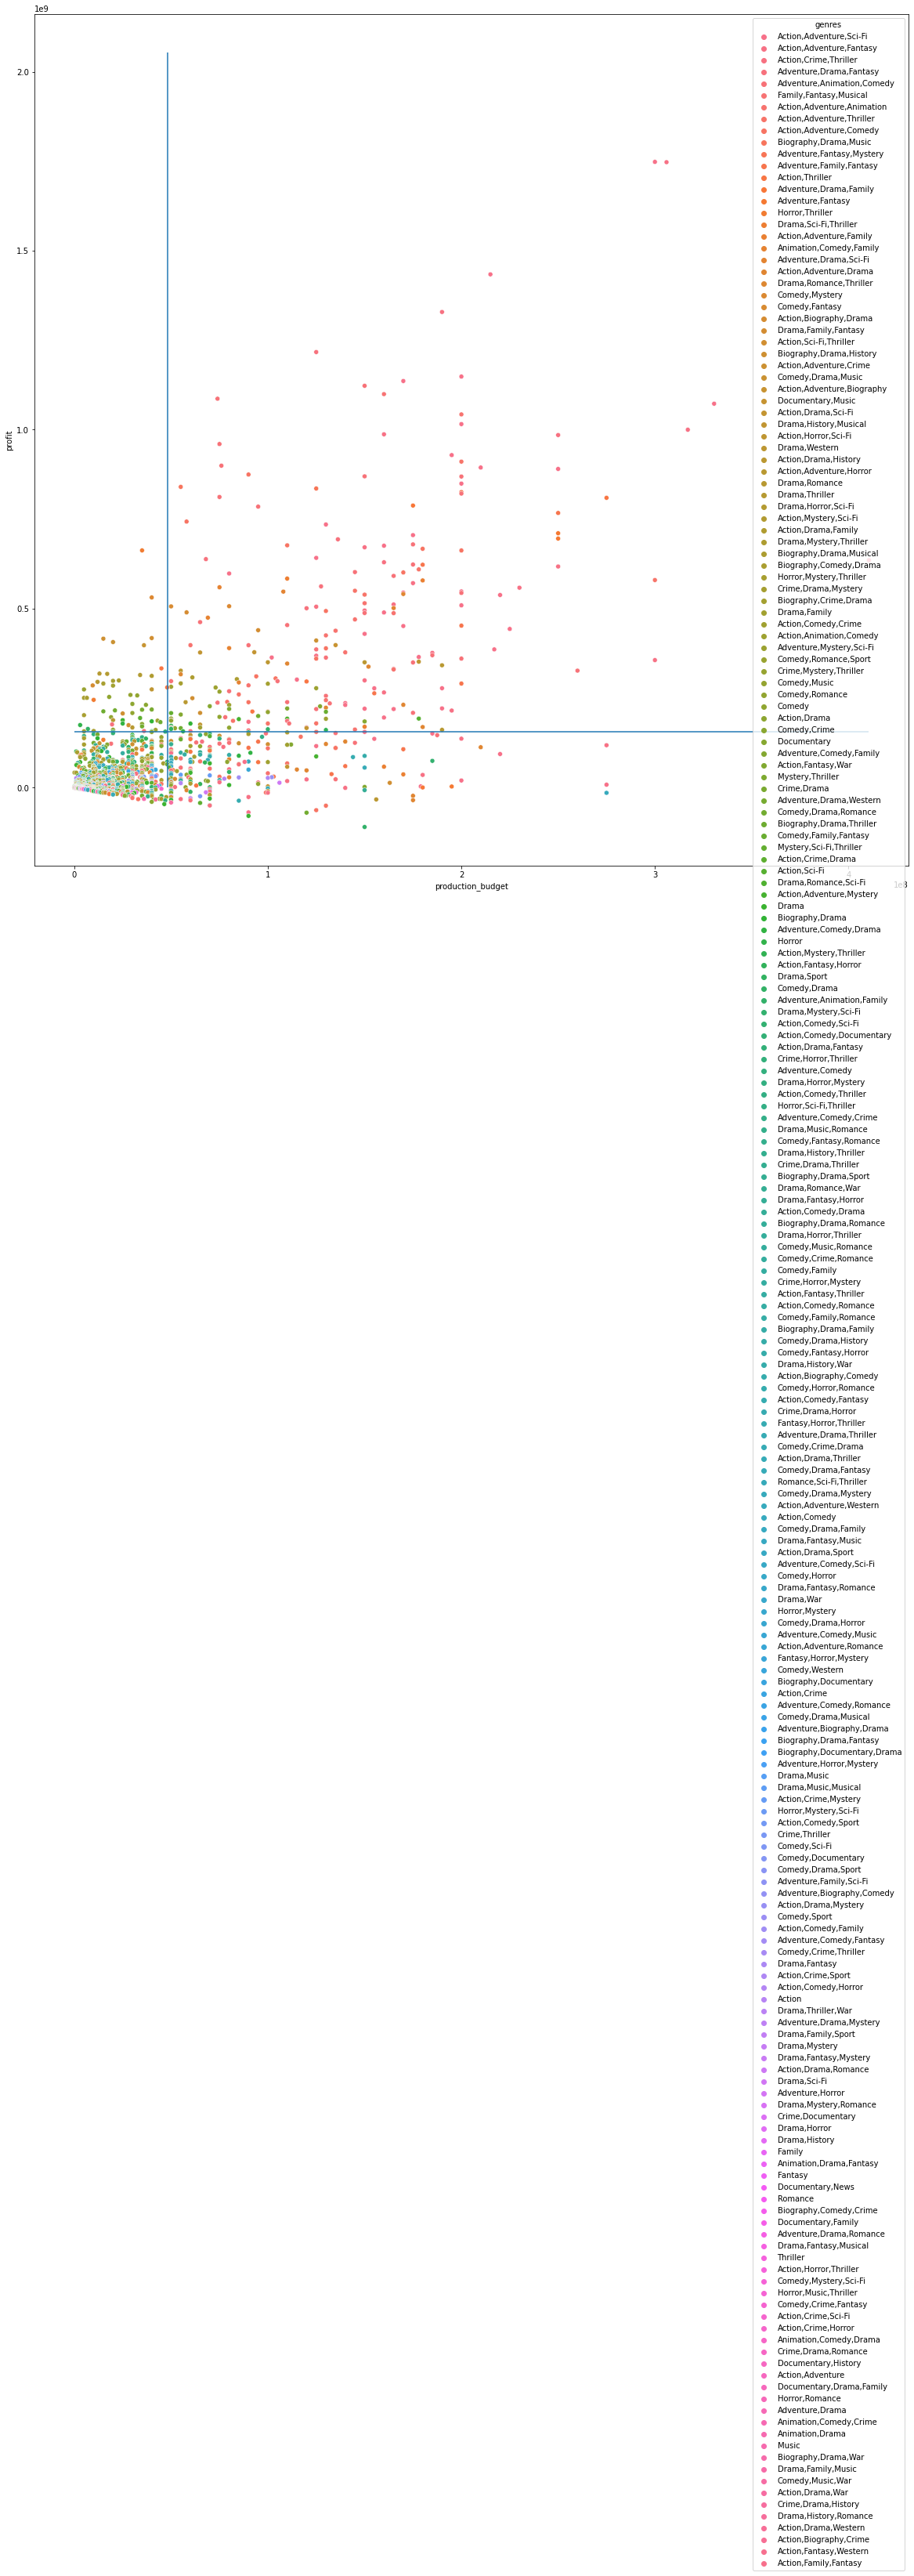

In [145]:
#Scatter Plot of production budge vs worldwide gross with genre as legend, come back to fix
fig, ax = plt.subplots(figsize = (20,20))

sns.scatterplot( x = "production_budget", y = "profit", hue = "genres", 
                data = df_Numbers_IMDB_BOM.sort_values('profit',ascending = False))
ax.vlines(df_Numbers_IMDB_BOM["production_budget"].mean(),ymin = df_Numbers_IMDB_BOM["worldwide_gross"].min(),
         ymax = df_Numbers_IMDB_BOM['worldwide_gross'].max())
ax.hlines(df_Numbers_IMDB_BOM["worldwide_gross"].mean(), xmin = df_Numbers_IMDB_BOM["production_budget"].min(),
         xmax = df_Numbers_IMDB_BOM["production_budget"].max())

In [152]:
df_month = df_Numbers_IMDB_BOM.groupby(["month_name"]).mean().reset_index()
df_month.sort_values("month", inplace = True)
df_month.head()

,month_name,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
4,January,2013.840909,102.729412,52.227273,3.265455e+07,8.838203e+07,3.466401e+07,2013.795455,1,5.572748e+07
3,February,2013.755102,105.567010,55.132653,4.327020e+07,1.354217e+08,6.128938e+07,2013.826531,2,9.215153e+07
7,March,2013.730159,103.512195,48.230159,5.072341e+07,1.395748e+08,5.209644e+07,2013.809524,3,8.885139e+07
0,April,2013.462185,106.854701,50.378151,3.406122e+07,1.227611e+08,4.557672e+07,2013.428571,4,8.869989e+07
8,May,2013.526316,110.621053,49.463158,7.832842e+07,2.416901e+08,8.867677e+07,2013.484211,5,1.633616e+08


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

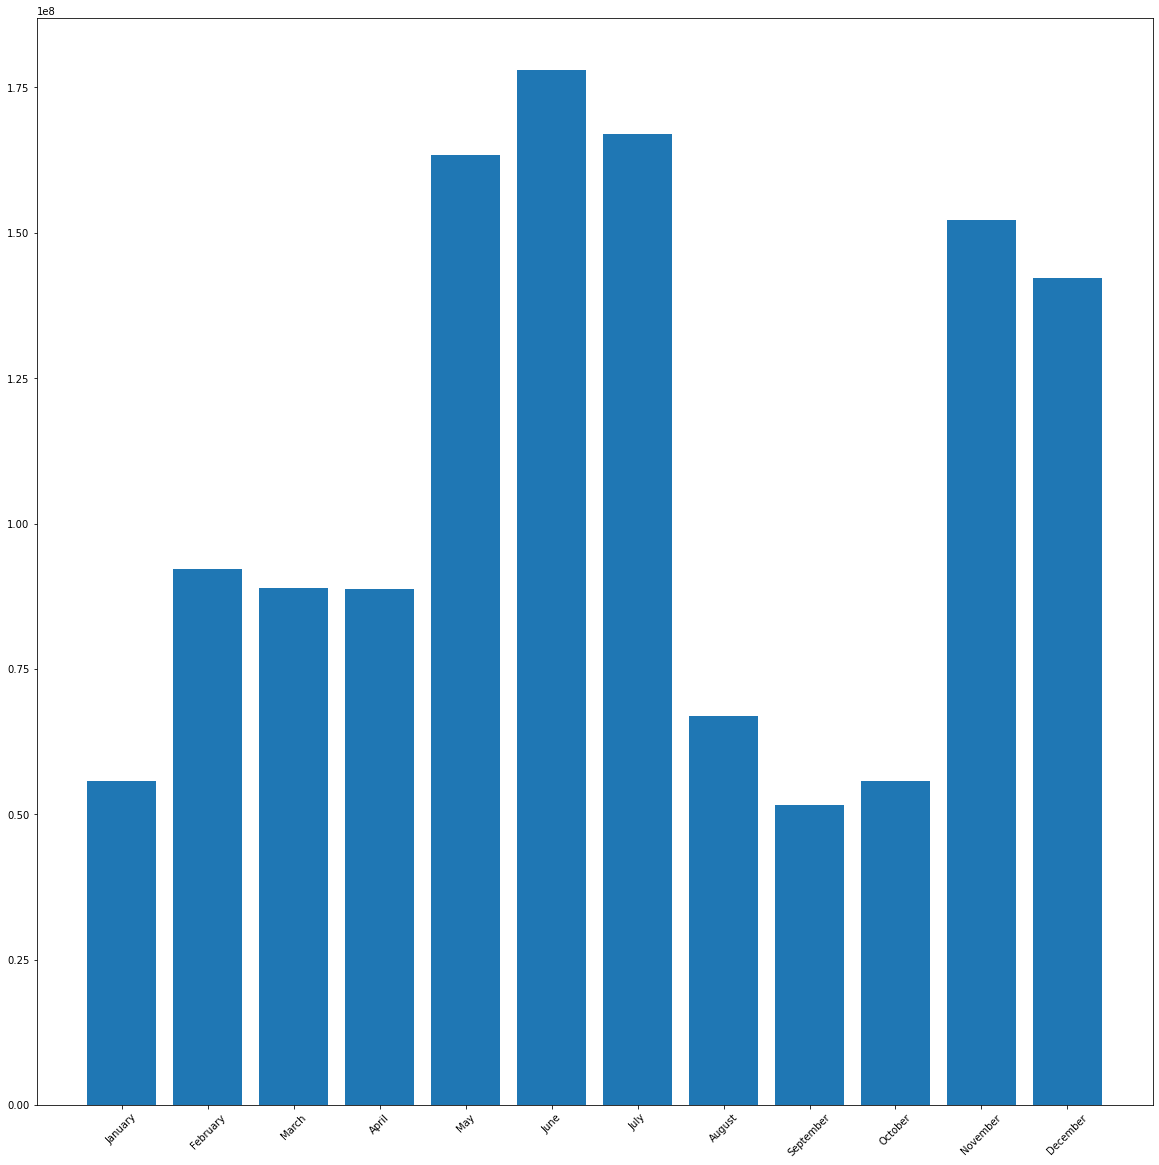

In [153]:
# graph of world wide gross by month
fig, ax = plt.subplots(figsize = (20,20))

x = df_month['month_name']
y = df_month["profit"]

ax.bar(x, y)
plt.xticks(rotation = 45)

In [156]:
df_test = df_Numbers_IMDB_BOM.groupby(["month_name","genres"]).mean().reset_index()
df_test.sort_values('month', inplace = True)
df_test


,month_name,genres,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
263,January,"Action,Crime,Drama",2015.250000,112.750000,35.500000,36250000.0,7.608717e+07,44575000.0,2015.250000,1,3.983717e+07
275,January,"Animation,Drama,Fantasy",2016.000000,108.000000,41.000000,43000000.0,4.641453e+07,3700000.0,2016.000000,1,3.414530e+06
274,January,"Adventure,Comedy,Family",2014.000000,95.000000,5.000000,55000000.0,2.587891e+08,76300000.0,2015.000000,1,2.037891e+08
273,January,"Adventure,Comedy,Drama",2017.000000,100.000000,86.000000,25000000.0,2.036716e+08,64500000.0,2017.000000,1,1.786716e+08
272,January,"Adventure,Animation,Comedy",2015.000000,87.500000,40.500000,24000000.0,7.653281e+07,40700000.0,2015.000000,1,5.253281e+07
...,...,...,...,...,...,...,...,...,...,...,...
148,December,"Adventure,Comedy,Family",2012.000000,91.500000,36.500000,119500000.0,2.928872e+08,78250000.0,2012.000000,12,1.733872e+08
147,December,"Adventure,Comedy,Drama",2014.666667,117.333333,56.666667,57400000.0,1.406720e+08,67900000.0,2014.666667,12,8.327201e+07
146,December,"Adventure,Comedy,Crime",2018.000000,90.000000,58.000000,42000000.0,4.192660e+07,30600000.0,2018.000000,12,-7.339500e+04
153,December,"Adventure,Fantasy",2013.500000,152.500000,21.500000,250000000.0,9.529722e+08,256749999.5,2013.500000,12,7.029722e+08


<AxesSubplot:xlabel='month_name', ylabel='profit'>

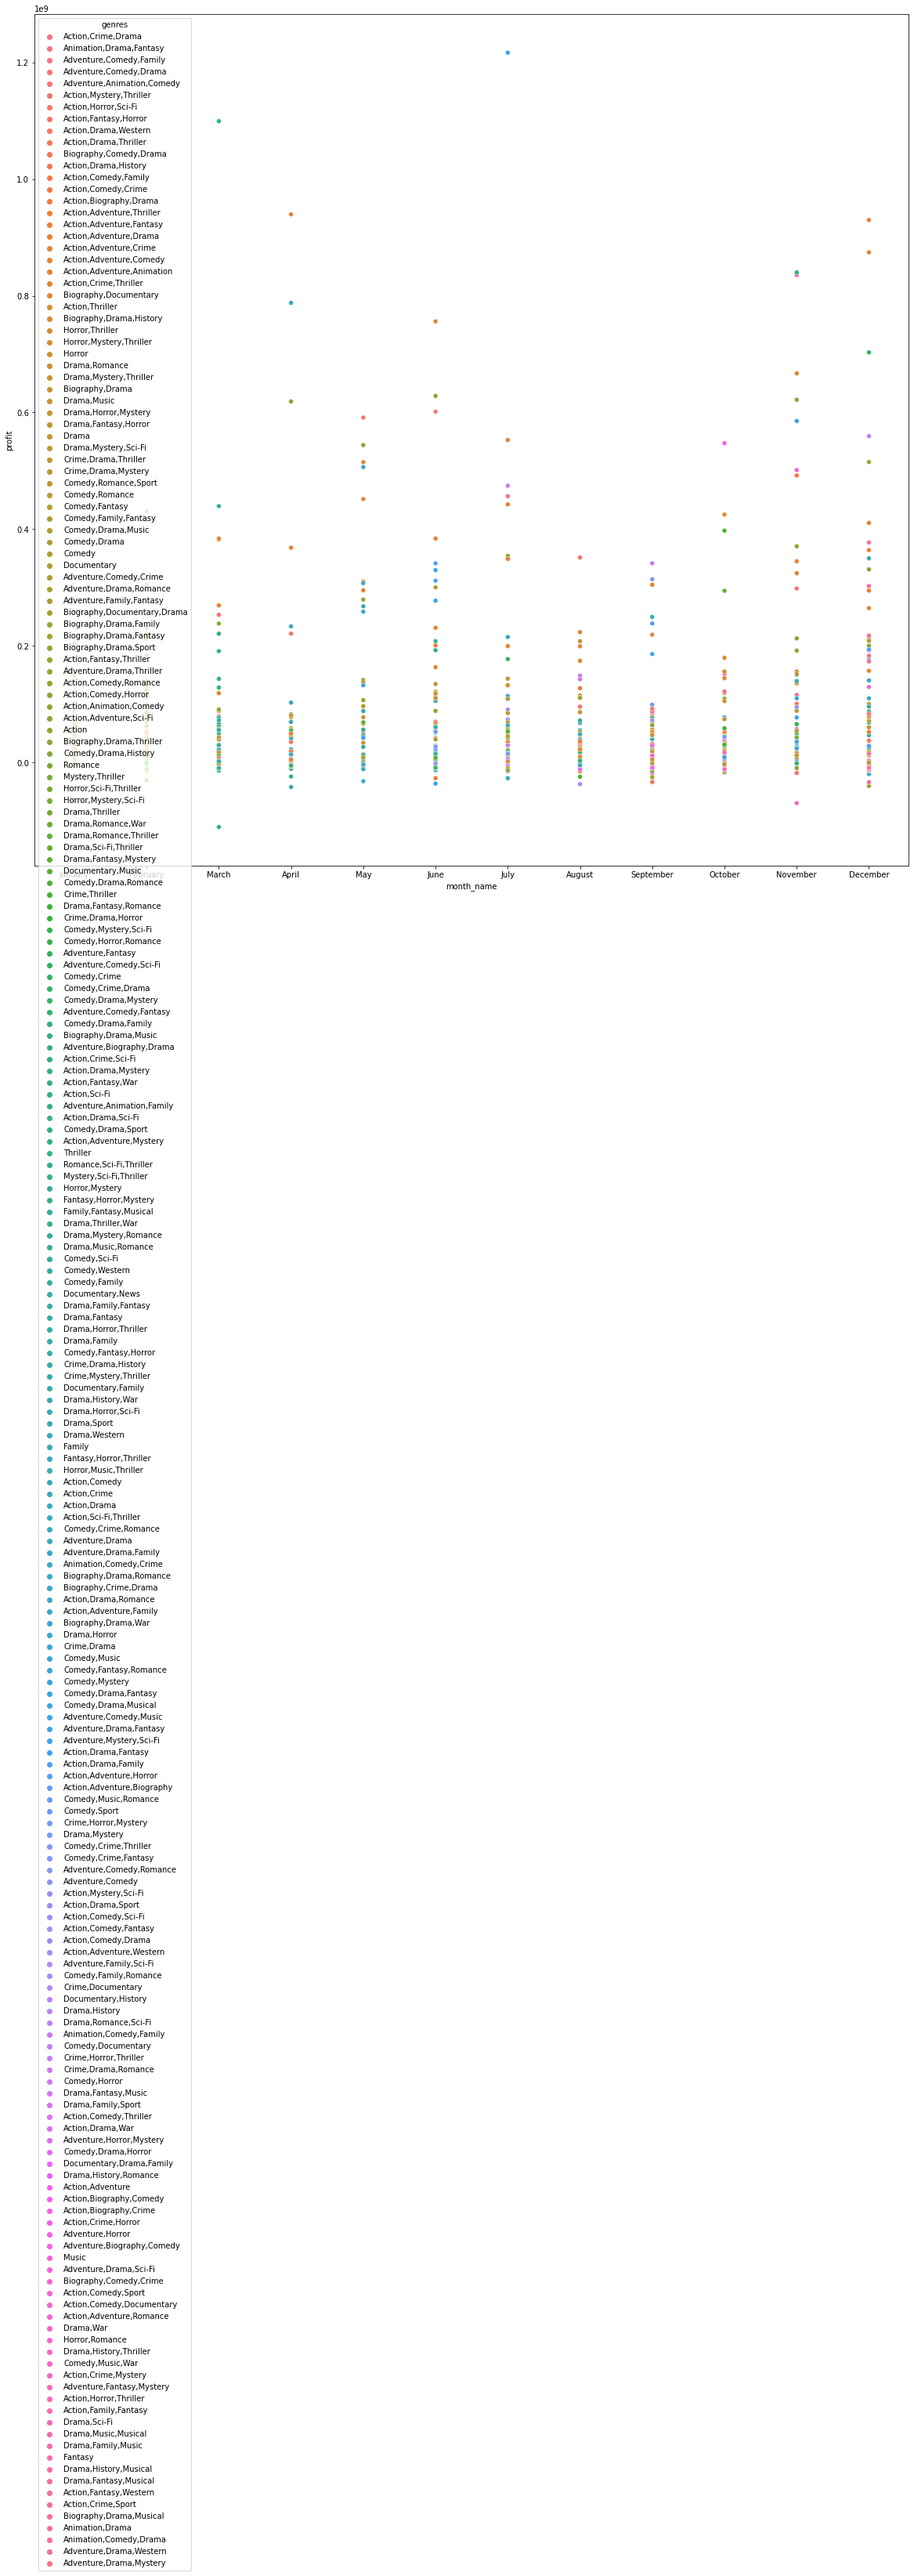

In [157]:
fig, ax = plt.subplots(figsize = (20,20))

sns.scatterplot( x = "month_name", y = "profit", hue = "genres", 
                data = df_test)

In [178]:
df_studio = df_Numbers_IMDB_BOM.groupby(by = "studio").mean().reset_index()
df_studio
df_studio = df_studio.loc[df_studio['profit'] > 100000000]
df_studio

,studio,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
17,BV,2014.033708,115.561798,39.573034,1.329079e+08,4.913911e+08,1.886303e+08,2013.898876,7.112360,3.584832e+08
38,Fox,2013.688000,109.568000,45.864000,6.864560e+07,2.327364e+08,8.230000e+07,2013.712000,7.320000,1.640908e+08
44,GrtIndia,2017.000000,167.000000,55.000000,3.000000e+07,2.635029e+08,2.020000e+07,2017.000000,4.000000,2.335029e+08
71,P/DW,2010.900000,101.500000,43.900000,1.334000e+08,5.078028e+08,1.682900e+08,2010.900000,6.700000,3.744028e+08
77,Par.,2013.885057,111.091954,53.885057,6.672414e+07,2.114248e+08,8.424260e+07,2013.896552,7.229885,1.447007e+08
91,Sony,2013.795181,110.542169,51.493976,7.084940e+07,2.283523e+08,9.200000e+07,2013.807229,7.337349,1.575029e+08
94,Sum.,2011.142857,103.857143,64.214286,4.480714e+07,1.619954e+08,6.588364e+07,2010.571429,6.357143,1.171883e+08
100,Uni.,2014.022556,109.699248,52.225564,5.738120e+07,2.299408e+08,8.971457e+07,2014.045113,6.488722,1.725596e+08
104,WB,2013.760684,114.341880,54.025641,8.223077e+07,2.407148e+08,9.682051e+07,2013.786325,6.923077,1.584840e+08
105,WB (NL),2014.119048,109.214286,49.214286,5.549048e+07,2.208146e+08,8.968095e+07,2014.119048,6.476190,1.653242e+08


<BarContainer object of 10 artists>

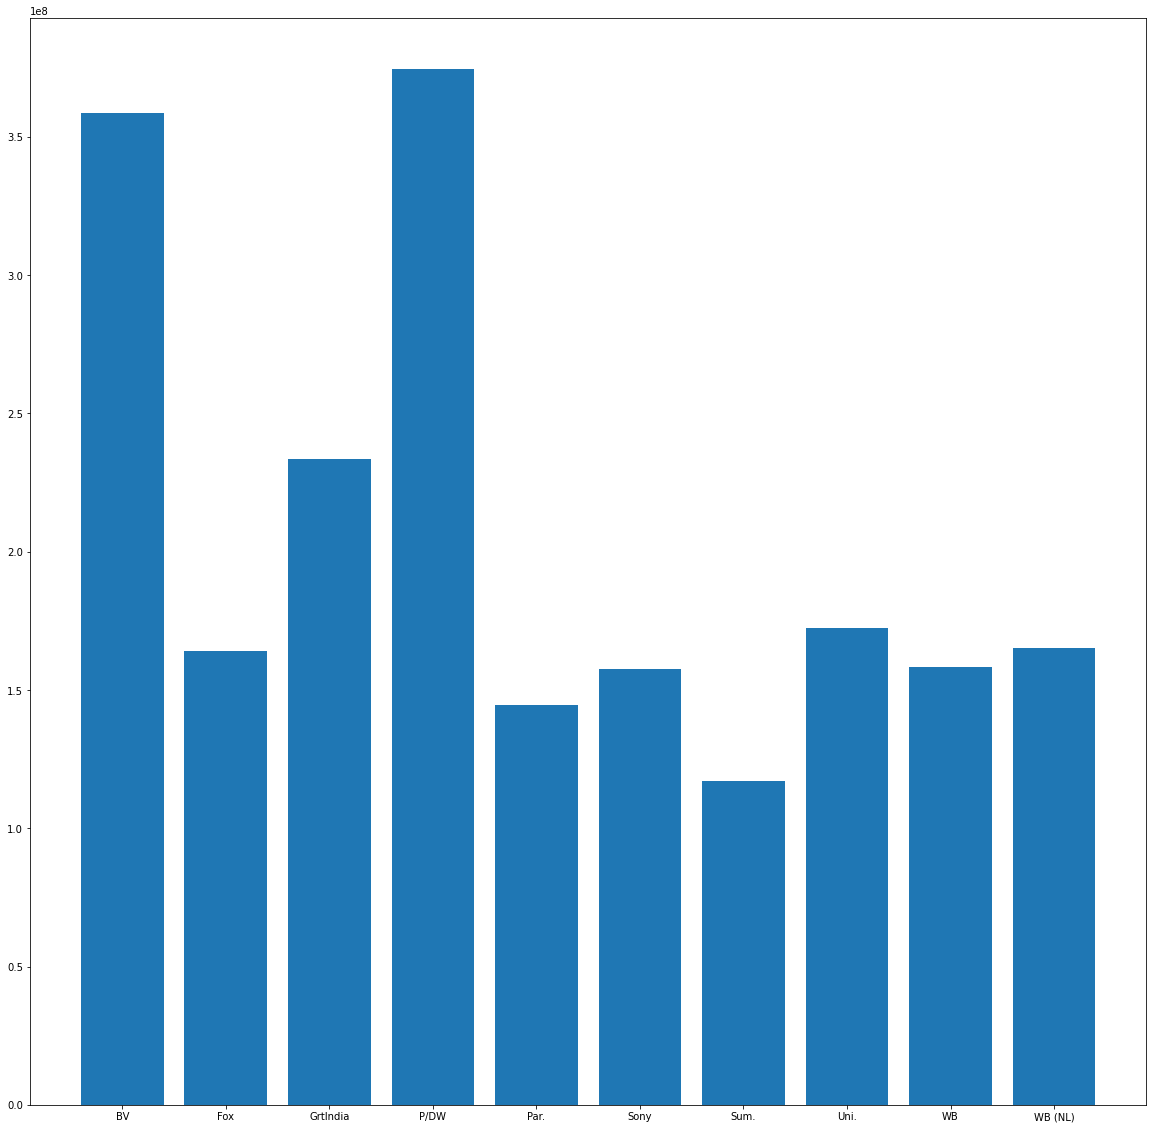

In [179]:
fig, ax = plt.subplots(figsize = (20,20))
x = df_studio['studio']
y = df_studio['profit'] 

ax.bar(x,y)

In [190]:
df_Numbers_IMDB_BOM.loc[df_Numbers_IMDB_BOM['studio'] == 'WB (NL)']

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,...,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,month,month_name,profit
51,tt0480687,Hall Pass,Hall Pass,2011.0,105.0,"Comedy,Romance",Hall Pass 2011,57.0,2011-02-25,Hall Pass,...,"$45,060,734",87173475,Hall Pass,WB (NL),45100000.0,38100000,2011.0,2,February,19173475
73,tt0790628,The Incredible Burt Wonderstone,The Incredible Burt Wonderstone,2013.0,100.0,"Adventure,Comedy,Fantasy",The Incredible Burt Wonderstone 2013,7.0,2013-03-15,The Incredible Burt Wonderstone,...,"$22,537,881",27392609,The Incredible Burt Wonderstone,WB (NL),22500000.0,4900000,2013.0,3,March,-4607391
93,tt0817230,Valentine's Day,Valentine's Day,2010.0,125.0,"Comedy,Romance",Valentine's Day 2010,70.0,2010-02-12,Valentine's Day,...,"$110,485,654",217569328,Valentine's Day,WB (NL),110500000.0,106000000,2010.0,2,February,165569328
119,tt0903624,The Hobbit: An Unexpected Journey,The Hobbit: An Unexpected Journey,2012.0,169.0,"Adventure,Family,Fantasy",The Hobbit: An Unexpected Journey 2012,19.0,2012-12-14,The Hobbit: An Unexpected Journey,...,"$303,003,568",1017003568,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000,2012.0,12,December,767003568
252,tt1161864,The Rite,The Rite,2011.0,114.0,"Drama,Horror,Mystery",The Rite 2011,100.0,2011-01-28,The Rite,...,"$33,047,633",97143987,The Rite,WB (NL),33000000.0,63000000,2011.0,1,January,60143987
254,tt1170358,The Hobbit: The Desolation of Smaug,The Hobbit: The Desolation of Smaug,2013.0,161.0,"Adventure,Fantasy",The Hobbit: The Desolation of Smaug 2013,21.0,2013-12-13,The Hobbit: The Desolation of Smaug,...,"$258,366,855",960366855,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,700000000,2013.0,12,December,710366855
260,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,2010.0,95.0,"Crime,Drama,Horror",A Nightmare on Elm Street 2010,49.0,2010-04-30,A Nightmare on Elm Street,...,"$63,075,011",117729621,A Nightmare on Elm Street (2010),WB (NL),63100000.0,52600000,2010.0,4,April,82729621
354,tt1261945,Sex and the City 2,Sex and the City 2,2010.0,146.0,"Comedy,Drama,Romance",Sex and the City 2 2010,16.0,2010-05-27,Sex and the City 2,...,"$95,347,692",294680778,Sex and the City 2,WB (NL),95300000.0,193000000,2010.0,5,May,199680778
385,tt1292566,How to Be Single,How to Be Single,2016.0,110.0,"Comedy,Drama,Romance",How to Be Single 2016,98.0,2016-02-12,How to be Single,...,"$46,843,513",100003780,How to Be Single,WB (NL),46800000.0,65500000,2016.0,2,February,63003780
417,tt1322312,Going the Distance,Going the Distance,2010.0,102.0,"Comedy,Romance",Going the Distance 2010,11.0,2010-09-03,Going the Distance,...,"$17,804,299",43603990,Going the Distance,WB (NL),17800000.0,24200000,2010.0,9,September,11603990
